In [1]:
# for data processing
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import matplotlib.image as mpimg
from PIL import Image

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
print(tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

2.14.0


In [2]:
labels=os.listdir("Africa")
labels

['buffalo', 'elephant', 'rhino', 'zebra']

In [3]:
os.listdir("Africa/Buffalo")[:5]

['001.jpg', '001.txt', '002.jpg', '002.txt', '003.jpg']

In [4]:
data_buffalo_258=open("Africa/Buffalo/258.txt")
data_buffalo_258.read()

'0 0.646484 0.656081 0.697656 0.666216'

#### Gathering file paths

Este código recorre archivos en un directorio específico, muestra imágenes que no son archivos de texto y se detiene después de mostrar tres imágenes.

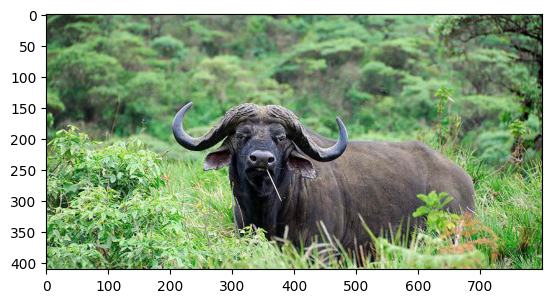

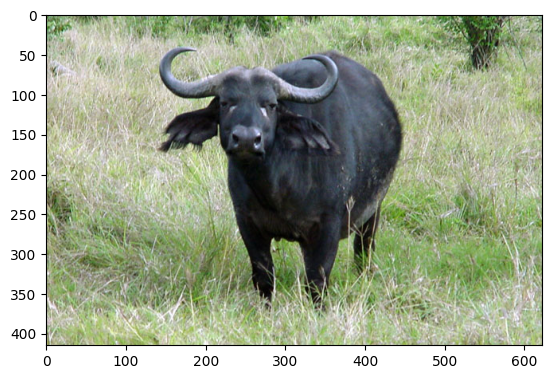

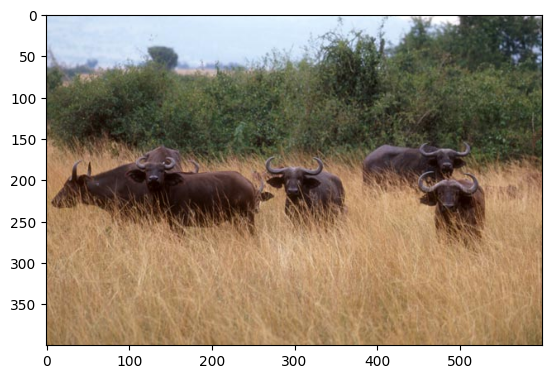

In [5]:

k = 0
buffalo_dir = 'Africa/buffalo/'

# Check if the directory exists
if not os.path.exists(buffalo_dir):
    print(f"The directory {buffalo_dir} does not exist.")
else:
    for i in os.listdir(buffalo_dir):
        if i.lower().endswith('.txt'):
            continue

        img_path = os.path.join(buffalo_dir, i)
                        
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.show()
        k += 1
        
        if k == 3:
            break

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#### Split of data for Buffalo

In [7]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/buffalo/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(0) #Crea una lista con valores 0, categ buffalo

In [8]:
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop(columns=['label'],axis=1)
y=data['label']

In [9]:
xtr1,xts1,ytr1,yts1=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

In [10]:
xtr1.shape,xts1.shape,ytr1.shape,yts1.shape

((300, 49152), (76, 49152), (300,), (76,))

In [11]:
xtr1.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
284,0.519599,0.451565,0.307387,0.533714,0.449971,0.369410,0.538464,0.448719,0.385554,0.457740,...,0.374727,0.556689,0.424983,0.358626,0.618435,0.484646,0.421990,0.623556,0.483210,0.432557
272,0.539386,0.640508,0.784159,0.585133,0.686315,0.840351,0.591336,0.703762,0.859850,0.606781,...,0.552594,0.815089,0.698481,0.556390,0.789968,0.638342,0.536721,0.795125,0.680806,0.588876
214,0.265506,0.326634,0.244745,0.220446,0.289718,0.201438,0.202913,0.276875,0.183888,0.197953,...,0.389224,0.456221,0.452299,0.373798,0.414389,0.410467,0.332106,0.394976,0.391054,0.317808
63,0.215284,0.204159,0.149446,0.225344,0.222244,0.164973,0.281663,0.292265,0.218353,0.376262,...,0.469271,0.706944,0.649823,0.514919,0.658088,0.586805,0.469326,0.683373,0.596429,0.484296
134,0.851945,0.859788,0.805303,0.909753,0.917597,0.867583,0.827731,0.834832,0.795381,0.782488,...,0.942330,0.971351,0.950646,0.931040,0.970542,0.941140,0.921534,0.996876,0.967809,0.948203


#### Split of data for Elephant

In [12]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/Elephant/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/Elephant/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(1) #Crea una lista con valores 1, categ buffalo
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop(columns=['label'],axis=1)
y=data['label']
xtr2,xts2,ytr2,yts2=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

#### Split of data for Rhino

In [13]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/Rhino/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/Rhino/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(2) #Crea una lista con valores 1, categ buffalo
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop(columns=['label'],axis=1)
y=data['label']
xtr3,xts3,ytr3,yts3=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

#### Split of data for Zebra

In [14]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/Zebra/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/Zebra/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(3) #Crea una lista con valores 1, categ buffalo
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop(columns=['label'],axis=1)
y=data['label']
xtr4,xts4,ytr4,yts4=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

# Data Frame Generation

**Creating** separate train and test of each type of animal.

In [15]:
X_train=pd.concat([xtr1,xtr2,xtr3,xtr4],axis=0)
y_train=pd.concat([ytr1,ytr2,ytr3,ytr4],axis=0)
X_test=pd.concat([xts1,xts2,xts3,xts4],axis=0)
y_test=pd.concat([yts1,yts2,yts3,yts4],axis=0)

Connecting the train parts and test parts of each folder.

In [16]:
train=pd.concat([X_train,y_train],axis=1)
train=train.sample(frac=1)
test=pd.concat([X_test,y_test],axis=1)
test.sample(frac=1)

X_train=train.drop(columns=['label'],axis=1)
y_train=train['label']
X_test=test.drop(columns=['label'],axis=1)
y_test=test['label']

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

In [18]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

Reshuffling the train and test dataset.

In [20]:
X_train=X_train.reshape(1200,128,128,3)
X_test=X_test.reshape(304,128,128,3)

Producing Featureset and Target Value from the data.

In [21]:
decoder=['Buffalo','Elephant','Rhino','Zebra']

In [22]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

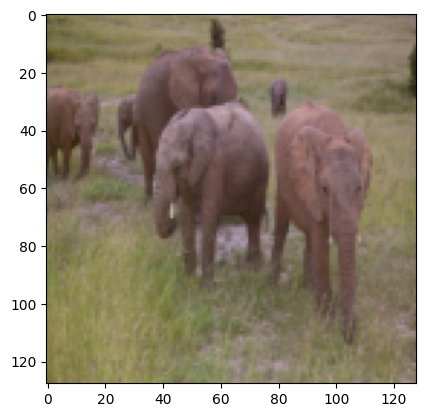

Elephant


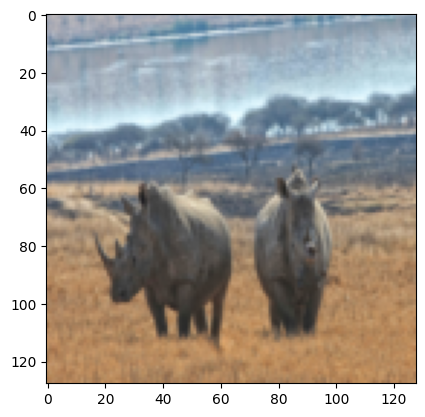

Rhino


In [23]:
for i in range(2):
  plt.imshow(X_train[i])
  plt.show()
  print(decoder[y_train[i]])

In [24]:
y_train=y_train.reshape(1200,1)
y_tets=y_test.reshape(304,1)

# Build the Model

In [25]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 dense (Dense)               (None, 126, 126, 64)      4160      
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 dense_1 (Dense)             (None, 126, 126, 64)      4160      
                                                                 
 dropout_1 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 182s 3s/step - loss: 2.8643 - accuracy: 0.3567 - val_loss: 1.2975 - val_accuracy: 0.5033
Epoch 2/10
60/60 [==============================] - 180s 3s/step - loss: 1.0921 - accuracy: 0.5258 - val_loss: 1.0163 - val_accuracy: 0.5461
Epoch 3/10
60/60 [==============================] - 165s 3s/step - loss: 0.7440 - accuracy: 0.7017 - val_loss: 0.9316 - val_accuracy: 0.5987
Epoch 4/10
60/60 [==============================] - 160s 3s/step - loss: 0.4507 - accuracy: 0.8475 - val_loss: 0.9544 - val_accuracy: 0.5789
Epoch 5/10
60/60 [==============================] - 171s 3s/step - loss: 0.1833 - accuracy: 0.9567 - val_loss: 1.1099 - val_accuracy: 0.6316
Epoch 6/10
60/60 [==============================] - 154s 3s/step - loss: 0.0773 - accuracy: 0.9817 - val_loss: 1.3011 - val_accuracy: 0.5822
Epoch 7/10
60/60 [==============================] - 172s 3s/step - loss: 0.0490 - accuracy: 0.9900 - val_loss: 1.4677 - val_accuracy: 0.5789
Epoch 8/10
60

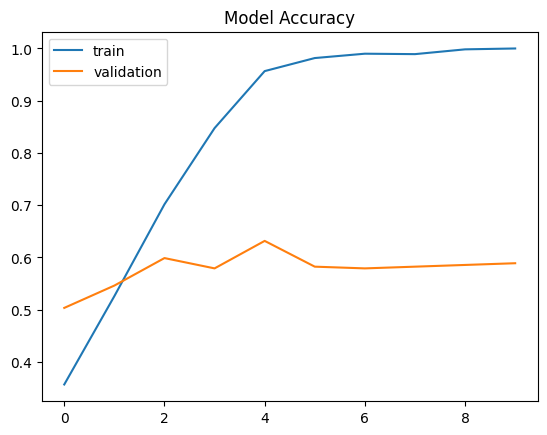

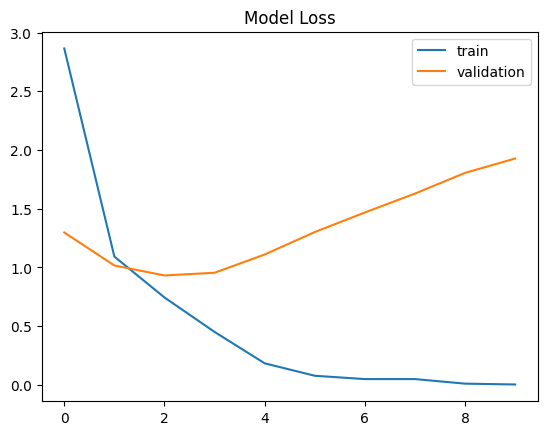

In [29]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Kernel (3,3)

In [30]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(4,4),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      3136      
                                                                 
 dense_4 (Dense)             (None, 125, 125, 64)      4160      
                                                                 
 dropout_2 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 dense_5 (Dense)             (None, 125, 125, 64)      4160      
                                                                 
 dropout_3 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 flatten_1 (Flatten)         (None, 1000000)           0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
20/60 [=========>....................] - ETA: 1:45 - loss: 8.7874 - accuracy: 0.2675


KeyboardInterrupt



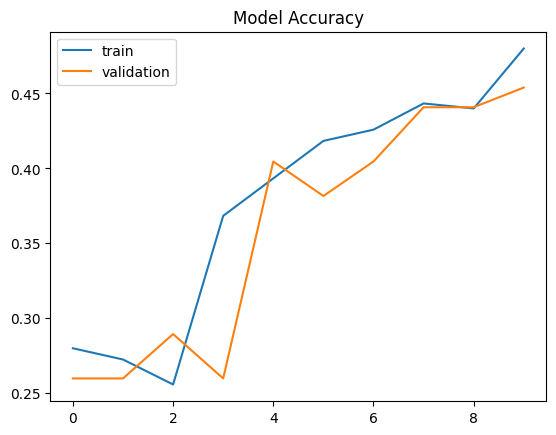

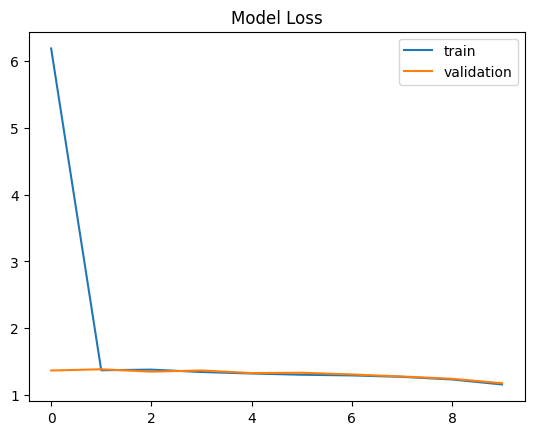

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Kernel (4,4)

So we can say that the best kernel size for this model is (3,3)

In [34]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 dense_8 (Dense)             (None, 126, 126, 64)      4160      
                                                                 
 dropout_4 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 dense_9 (Dense)             (None, 126, 126, 64)      4160      
                                                                 
 dropout_5 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 flatten_2 (Flatten)         (None, 1016064)           0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
epoch=6

In [39]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/6
60/60 [==============================] - 158s 3s/step - loss: 5.0765 - accuracy: 0.3625 - val_loss: 1.2637 - val_accuracy: 0.3750
Epoch 2/6
60/60 [==============================] - 156s 3s/step - loss: 1.1311 - accuracy: 0.4850 - val_loss: 1.1753 - val_accuracy: 0.4507
Epoch 3/6
60/60 [==============================] - 151s 3s/step - loss: 1.0428 - accuracy: 0.5408 - val_loss: 1.0908 - val_accuracy: 0.5493
Epoch 4/6
60/60 [==============================] - 161s 3s/step - loss: 0.9501 - accuracy: 0.6050 - val_loss: 1.0369 - val_accuracy: 0.5296
Epoch 5/6
60/60 [==============================] - 153s 3s/step - loss: 0.7570 - accuracy: 0.6958 - val_loss: 0.9545 - val_accuracy: 0.6118
Epoch 6/6
60/60 [==============================] - 154s 3s/step - loss: 0.5063 - accuracy: 0.8108 - val_loss: 1.0807 - val_accuracy: 0.5658


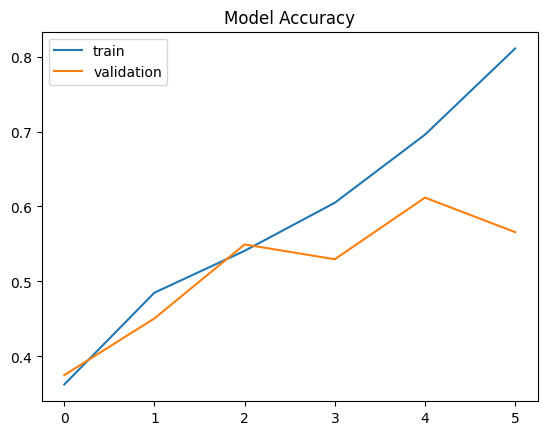

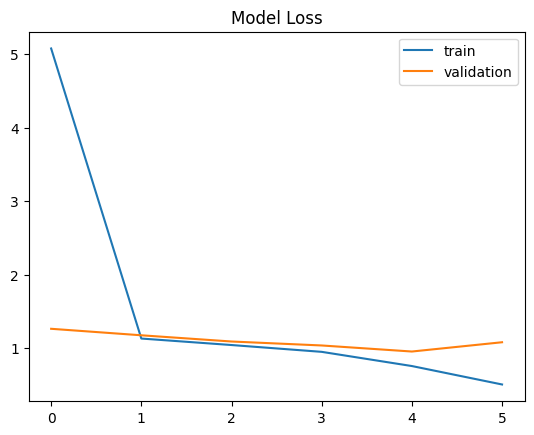

In [40]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [41]:
prediction=model.predict(X_test)
type(prediction[0])

10/10 [==============================] - 4s 314ms/step


numpy.ndarray

As the model produces prediction as tensors we have to find the actual prediction with the numpy function argmax (numpy.argmax).

In [42]:
tr_pred=model.predict(X_train)
y1=[]
for i in tr_pred:
  y1.append(np.argmax(i))
ts_pred=model.predict(X_test)
y2=[]
for i in ts_pred:
  y2.append(np.argmax(i))

10/10 [==============================] - 5s 408ms/step


In [43]:
min(y1),max(y1)

(0, 3)

In [44]:
for i in range(len(y1)):
  y1[i]=decoder[y1[i]]
for i in range(len(y2)):
  y2[i]=decoder[y2[i]]

In [45]:
y_train=y_train.reshape(1200)
y_test=y_test.reshape(304)

In [46]:
y_1=[]
y_2=[]
for i in range(len(y_train)):
  y_1.append(decoder[y_train[i]])
for i in range(len(y_test)):
  y_2.append(decoder[y_test[i]])

#### Confusion matrix

(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

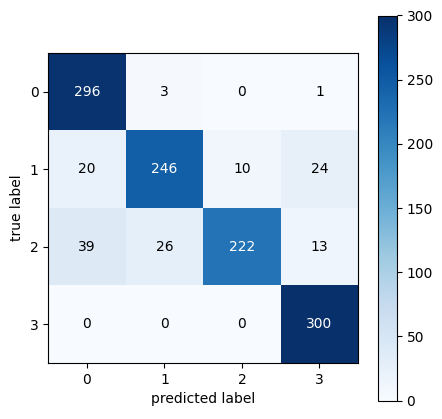

In [47]:
train_mat=confusion_matrix(y_1,y1)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)

(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

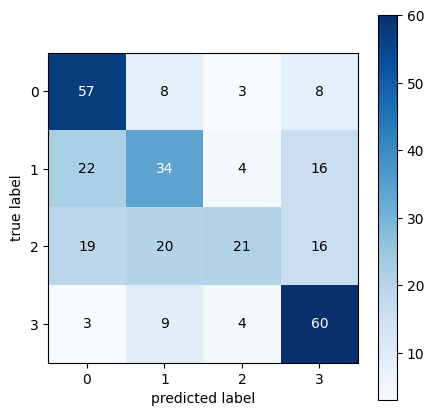

In [48]:
test_mat=confusion_matrix(y_2,y2)
plot_confusion_matrix(test_mat,figsize=(5,5),colorbar=True)

#### download el archivo 

In [49]:
# Use tensor flow

In [50]:
model.save('afric_tf.h5')

C:\Users\josec\anaconda3\envs\evelyn\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
import joblib

In [68]:
data_afric = "data_afric.joblib"

In [69]:
joblib.dump(model, data_afric)

['data_afric.joblib']

In [71]:
import pickle
with open('data_afric.pkl', 'wb') as file:
    pickle.dump(model, file)


file.close()

with open('mi_archivo.pkl', 'rb') as file:
    loaded_data = pickle.load(file)